# Unsupervised Learning & PCA with Logistic Regression

This notebook demonstrates key concepts of unsupervised learning through Principal
Component Analysis (PCA) and then compares the performance of a Logistic Regression
classifier when trained on the original standardized data versus on the PCA–reduced data.

In this notebook, we cover:

1. **Overview of Unsupervised Learning & PCA**  
   - We explain why unsupervised methods are used when there is no response variable.
   - PCA is introduced as a method to reduce dimensionality by finding linear combinations
     of the features that capture maximum variance.
   - The mathematical ideas behind PCA are briefly discussed (centering, scaling, loadings, scores, and
     the proportion of variance explained).

2. **Data Preprocessing**  
   - The Breast Cancer dataset is used as an example.
   - The features are centered and scaled since PCA is sensitive to the scale of the variables.

3. **PCA Computation and Visualization**  
   - We compute PCA to reduce the data to two dimensions.
   - A scatter plot of the principal component scores is generated.
   - A biplot is created to visualize both the scores and the feature loadings.
   - A scree plot is generated to display the cumulative proportion of variance explained.

4. **Logistic Regression**  
   - We split the dataset into training and testing sets.
   - A Logistic Regression model is trained on both:
       a) the original standardized features, and
       b) the two-dimensional PCA–reduced features.
   - The accuracy scores of both models are computed and printed for comparison.

Let's begin by importing the necessary libraries and performing the analysis.

## Step 1: Load and Preprocess the Data

We begin by loading the Breast Cancer dataset.
- The Breast Cancer dataset contains measurements for benign and malignant tumors.
- Here, the dataset provides:
    - `X` as a feature matrix
    - `y` as a target variable

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Feature matrix
y = breast_cancer.target  # Target variable (diagnosis)
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

print(y) # these are the target variables; 0 = benign (non-threatening), 1 = malignant (bad)
pd.DataFrame(X, columns = [feature_names])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Since PCA is sensitive to the scale of the variables, we must center and scale
the data.
- Centering ensures that each feature has a mean of zero, and scaling
ensures that each feature has unit variance.
- This prevents features with larger
numerical ranges from dominating the PCA results.

In [3]:
from sklearn.preprocessing import StandardScaler
# Making things apples to apples
# It is important to center and scale the features since PCA is sensitive to the variable scales.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Step 2: Compute PCA

In this step, we compute Principal Component Analysis (PCA) on the standardized data.
PCA seeks to find new axes (principal components) that maximize the variance of the data.
Each principal component is a linear combination of the original features.

**Key Points:**
- **Dimensionality Reduction:**  
  PCA reduces the dimensionality of the data while retaining as much of the variance as possible.
- **How It Works:**  
  The first principal component is the direction along which the data vary the most.
  Subsequent components are chosen to be orthogonal (uncorrelated) to the previous ones and
  capture the remaining variance.
- **Why Two Components:**  
  For visualization purposes, we reduce the data to 2 dimensions. This allows us to create 2D plots
  that illustrate the distribution of data points and the influence of the original features.

Below, we reduce the data to 2 components using the `PCA` class from scikit-learn and print the
explained variance ratio, which tells us the proportion of total variance captured by each component.

In [ ]:
from sklearn.decomposition import PCA

# We reduce the data to 2 components for visualization and further analysis.
pca = PCA(n_components = 2) # You have to give it the number of components you want to reduce the data into
# Telling the algorithm to find the two compenents that capture the most
X_pca = pca.fit_transform(X_std)

# Display the Explained Variance Ratio (i.e., the proportion of variance explained by each component)
explained_variance = pca.explained_variance_ratio_ # 62% of explained variance
np.cumsum(explained_variance) # (first component, cumulative sum w/ second component)

array([0.44272026, 0.63243208])

## Step 3: Visualization of PCA Results
Visualization is a key benefit of PCA. By projecting the data into 2 dimensions, we can:
1. **Scatter Plot of PCA Scores:**  
   Plot the data points in the new coordinate system defined by the first two principal components.
   This helps us see how the observations are spread out and whether distinct groups exist.
2. **Biplot:**  
   Overlay the original feature vectors (loadings) on the scatter plot to interpret the direction and
   contribution of each feature in the reduced space.
3. **Scree Plot:**  
   Plot the cumulative explained variance versus the number of components. This helps in deciding the
   number of components needed to capture most of the variance in the data (often by looking for an “elbow”
   in the plot).

The detailed instructions and visualizations below will help you understand the PCA results.

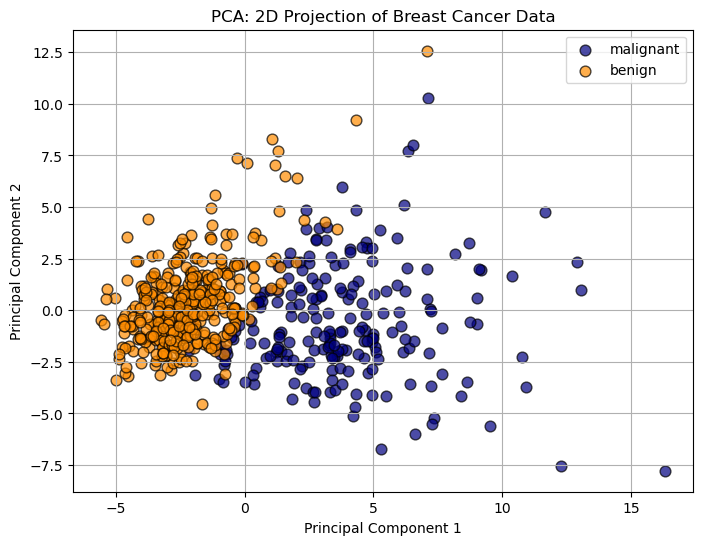

In [12]:
# 3a. Scatter Plot of PCA Scores
plt.figure(figsize=(8, 6))
colors = ['navy', 'darkorange']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.7,
                label=target_name, edgecolor='k', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Breast Cancer Data')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# This is pretty good job of splitting it up between two components!

### Biplot: PCA Scores with Feature Loadings

A biplot is a useful visualization that shows both the projected data points (scores) and
the contribution of the original features (loadings). The loading vectors indicate the
direction in which the original features contribute most to the variance captured by the
principal components.

- **Loadings:**  
  The PCA loadings are stored in `pca.components_` and represent the coefficients of the linear
  combinations that define each principal component.
- **Visualization:**  
  We scale the loading vectors for better visibility and overlay them as arrows on the scatter plot.

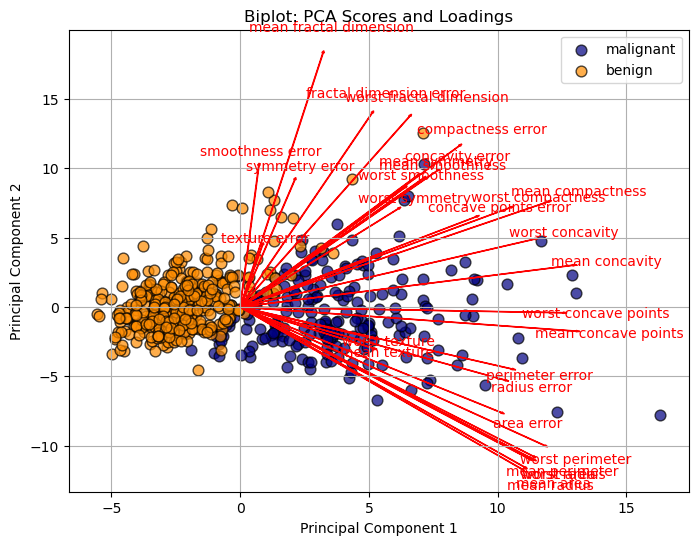

In [ ]:
# 3b. Biplot: Overlaying Feature Loadings on PCA Scatter Plot
# Compute the loadings (each column of pca.components_ represents a principal component)
loadings = pca.components_.T
scaling_factor = 50.0  # Increased scaling factor by 5 times

plt.figure(figsize=(8, 6))
# Plot the PCA scores as before
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.7,
                label=target_name, edgecolor='k', s=60)
# Plot the loadings as arrows
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, scaling_factor * loadings[i, 0], scaling_factor * loadings[i, 1],
              color='r', width=0.02, head_width=0.1)
    plt.text(scaling_factor * loadings[i, 0] * 1.1, scaling_factor * loadings[i, 1] * 1.1,  # Adjusted text position
             feature, color='r', ha='center', va='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot: PCA Scores and Loadings')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# This is trying to show you the directions of the plots (vectors) of the original features and looks absolutely insane

### Scree Plot: Cumulative Explained Variance

The scree plot displays the cumulative proportion of variance explained by the principal components.
It is a valuable tool for deciding how many components to retain for further analysis:
- **Elbow Method:**  
  Look for the "elbow" in the plot—beyond this point, additional components contribute only
  marginal gains in explained variance.
- **Interpretation:**  
  In our case, reducing the Breast Cancer data to 2 components explains a significant portion of the variance,
  which justifies our choice for visualization.

Below, we compute PCA without specifying the number of components to generate the full cumulative
explained variance plot.

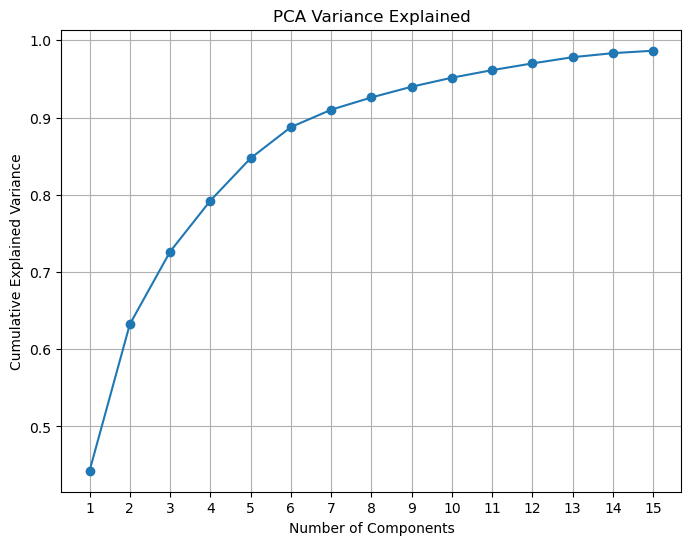

In [16]:
# 3c. Scree Plot: Cumulative Explained Variance
# This plot helps in determining how many components to retain (looking for the "elbow")
pca_full = PCA(n_components = 15).fit(X_std) # re-fitting the PCA model to having 15 components
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o') # Plots out each of the cumulative variances for each of the numbers of components
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.xticks(range(1, len(cumulative_variance)+1))
plt.grid(True)
plt.show()

# You can see the impact that adding more components has
# Once you get up to about 6 components, increased variance slows down a lot

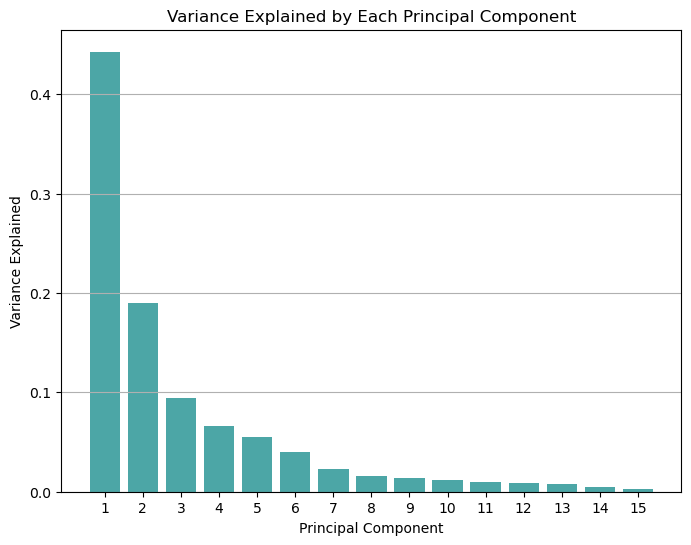

In [ ]:
# 3d. Bar Plot: Variance Explained by Each Component
plt.figure(figsize=(8, 6))
components = range(1, len(pca_full.explained_variance_ratio_) + 1)
plt.bar(components, pca_full.explained_variance_ratio_, alpha=0.7, color='teal')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(components)
plt.grid(True, axis='y')
plt.show()

# Looking at the individial variance explained
# How much each extra component brings to the table in terms of variance

In [18]:
explained = pca_full.explained_variance_ratio_ * 100  # individual variance (%) per component
components = np.arange(1, len(explained) + 1)
cumulative = np.cumsum(explained)

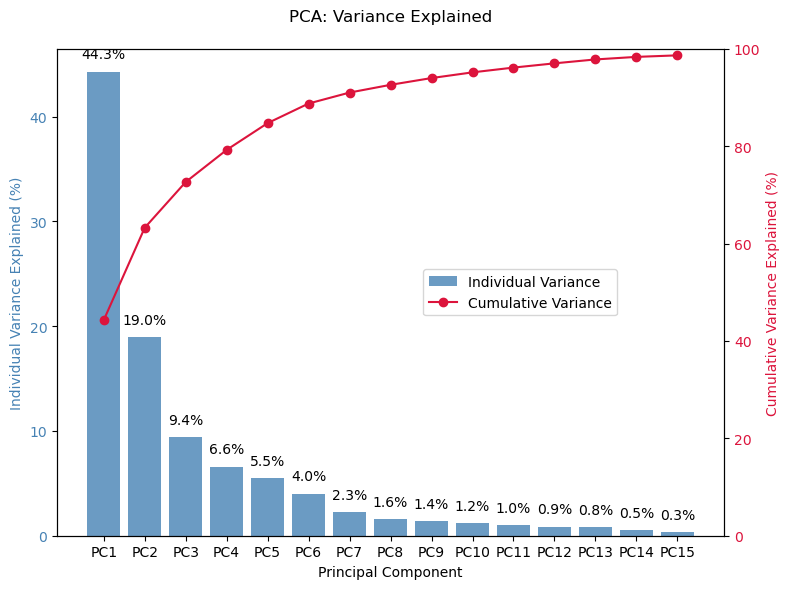

In [ ]:
 # Create the combined plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for individual variance explained
bar_color = 'steelblue'
ax1.bar(components, explained, color=bar_color, alpha=0.8, label='Individual Variance')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Individual Variance Explained (%)', color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)
ax1.set_xticks(components)
ax1.set_xticklabels([f"PC{i}" for i in components])

# Add percentage labels on each bar
for i, v in enumerate(explained):
    ax1.text(components[i], v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Create a second y-axis for cumulative variance explained
ax2 = ax1.twinx()
line_color = 'crimson'
ax2.plot(components, cumulative, color=line_color, marker='o', label='Cumulative Variance')
ax2.set_ylabel('Cumulative Variance Explained (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.set_ylim(0, 100)

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Combine legends from both axes and position the legend inside the plot (middle right)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right', bbox_to_anchor=(0.85, 0.5))

plt.title('PCA: Variance Explained', pad=20)
plt.tight_layout()
plt.show()

# Putting it all together
# Different thresholds that you want -- 80% is a really good spot
# Rule: look for the place where the individual variance explained creates an "elbow"
# Once you get above 4 components, you don't get much more variance explained; don't want to get above 5



---



## Step 4: Logistic Regression Classification Comparison (In-Groups)

Finally, we explore how the data representation affects supervised learning by comparing a Logistic Regression's performance on:
- **The Original Standardized Data:**  
  This is our baseline, using the full feature set.
- **The PCA–Reduced Data:**  
  Here, we use only the two principal components obtained from PCA.

**Procedure:**
1. Split the dataset (both the standardized and PCA–reduced versions) into training and test sets.
2. Train a Logistic Regression on each version.
3. Evaluate and compare their accuracy on the test data.

This exercise shows how dimensionality reduction via PCA might simplify the model while still
capturing most of the signal, though some loss in accuracy is possible.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the standardized (original) data into training and test sets
X_train_original, X_test_original, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42) # this has 30 features

# Split the PCA-reduced data into training and test sets (using the same random state)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42) # this has 2 features

In [25]:
# 4a. Logistic Regression on Original Data
log_reg_orig = LogisticRegression()
log_reg_orig.fit(X_train_original, y_train)
y_pred_orig = log_reg_orig.predict(X_test_original)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
print("Logistic Regression Accuracy with Original Data: {:.2f}%".format(accuracy_orig*100))

Logistic Regression Accuracy with Original Data: 97.37%


In [ ]:
# 4a. Logistic Regression on PCA Data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Logistic Regression Accuracy with PCA Data: {:.2f}%".format(accuracy_pca*100))

# We have better accuracy with standardized and 2 features!

Logistic Regression Accuracy with PCA Data: 99.12%


### Discussion

- **PCA Visualization:**  
  The scatter plot and biplot help us understand how the original high-dimensional data is
  projected onto two principal components, and how each original feature contributes to these
  components.

- **Explained Variance & Scree Plot:**  
  The explained variance ratios indicate the proportion of total variance captured by each
  component. The scree plot shows the cumulative variance, guiding us in selecting the number
  of components to retain.

- **Classifier Comparison:**  
  The Logistic Regression model is applied to both the original standardized data and the PCA–reduced
  data. By comparing the accuracy scores, we can assess the impact of dimensionality reduction on
  the classifier’s performance.

This notebook not only reinforces the theory behind PCA but also demonstrates its practical applications,
including how reduced representations can be used in downstream supervised learning tasks.